# Twitter clients

## Libraries

In [1]:
# System libs
import sys, os

# DB libs
import pymongo
from bson.son import SON

# Data libs
import pandas as pd
import numpy as np

# Viz libs
from pprint import pprint
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
%matplotlib inline

# Add src ("../../src") directory to path
src_dir = os.path.join(os.getcwd(), os.pardir, os.pardir, 'src')
sys.path.append(src_dir)

# db_handlers from project src/data directory
from data.db_handlers import mongodb_connect

## Connect to the db

In [2]:
db = mongodb_connect()

In [16]:
print(f"There are {db.tweets.count()} tweets in the db")

There are 3100 tweets in the db


## Most popular twitter clients

### DB query

Get the frequency of each twitter client (source) from the DB and sort by total count (highest to lowest).

In [3]:
pipeline = [
    {"$group": {"_id": "$source", "count": {"$sum": 1}}},
    {"$sort": SON([("count", -1), ("_id", -1)])}
]

In [4]:
tweet_sources = list(db.tweets.aggregate(pipeline))

Store the resulting query in a pandas dataframe because it's easier to work with.

In [5]:
source_df = pd.DataFrame(tweet_sources)

The 'source' field contains html which can be removed with some regex. The original column can then be dropped from the df.

In [6]:
source_df["source"] = source_df["_id"].str.replace(r'<[^>]+>', '')

In [7]:
source_df.drop("_id", axis=1, inplace=True)

In [8]:
source_df.head()

,count,source
0,1410,Twitter for iPhone
1,707,Twitter for Android
2,463,Twitter Web Client
3,139,Twitter for iPad
4,74,Twitter Lite


### Visualisation

In [9]:
print(f"There are {len(source_df)} unique clients in the data set.")

There are 50 unique clients in the data set.


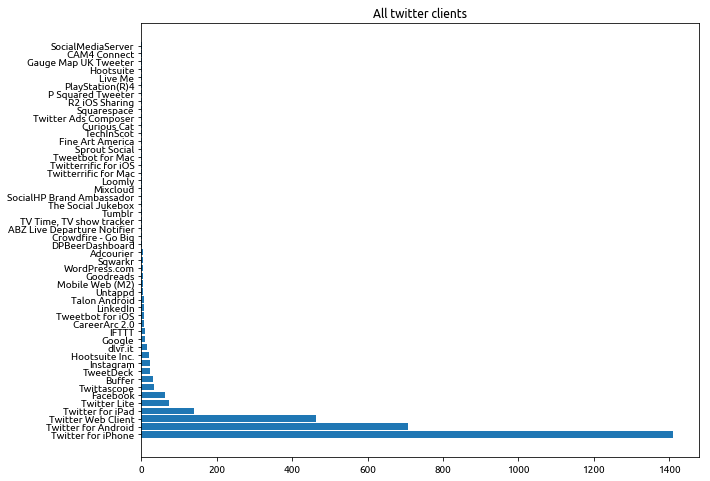

In [10]:
plt.figure(figsize=(10, 8))
plt.barh(y=source_df["source"], width=source_df["count"])
plt.title("All twitter clients")
plt.show()

The distribution is highly skewed, with the vast majority of twitter users preferring a very small number of clients.

In [11]:
popular_sources = source_df[source_df["count"] > 10]

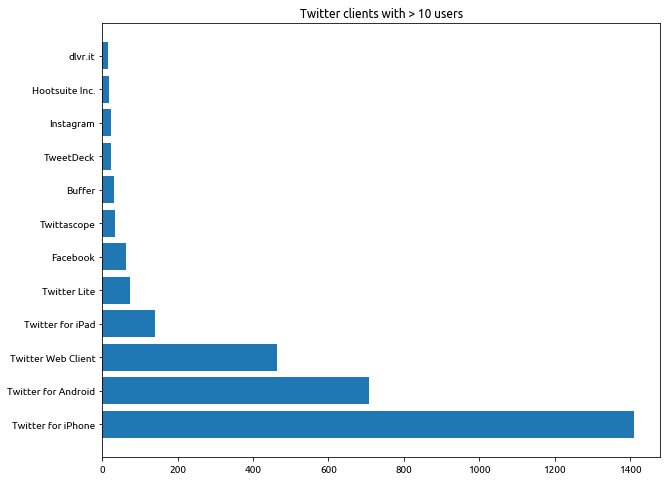

In [12]:
plt.figure(figsize=(10, 8))
plt.barh(y=popular_sources["source"], width=popular_sources["count"])
plt.title("Twitter clients with > 10 users")
plt.show()

In [13]:
top10_sources = source_df[:10]

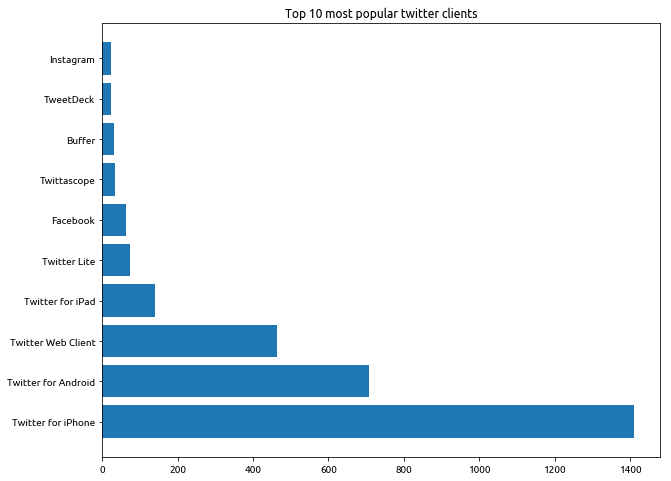

In [17]:
plt.figure(figsize=(10, 8))
plt.barh(y=top10_sources["source"], width=top10_sources["count"])
plt.title("Top 10 most popular twitter clients")
plt.show()